In [11]:
from constants import DATA_PATH
import pandas as pd

path = DATA_PATH / "EOS-04_datasheet.xlsx"

file = pd.ExcelFile(path)

In [13]:
dfs = [pd.read_excel(path, sheet_name=s) for s in file.sheet_names if s != 'UniqueCrops']

df = pd.concat(dfs).dropna()

df

,Sample Date & Time,Sample Id (Grid),Latitude (Centre of grid),Longitude (Centre of grid),HH-pol,HV-pol,SM1 (%),Crop Name
0,2022-06-01,1A,22.526048,72.765011,-9.30941,-17.00176,8.200000,Fallow
1,2022-06-01,1B,22.525481,72.765028,-8.10325,-15.88235,44.800000,Perl Millet
2,2022-06-01,1C,22.525423,72.765663,-9.62345,-17.15174,6.000000,Fallow
3,2022-06-01,1D,22.525999,72.765663,-9.94934,-19.37645,5.700000,Ortho
4,2022-06-01,1E,22.525563,72.765399,-6.80651,-17.59076,2.700000,Fallow
...,...,...,...,...,...,...,...,...
139,2023-07-14,28E,22.524049,72.768361,-7.45846,-16.64296,40.533333,Green Manary
140,2023-07-14,29A,22.523640,72.766727,-5.49065,-17.98820,50.000000,Paddy
141,2023-07-14,29B,22.523657,72.766016,-10.19415,-20.11052,50.000000,Paddy
142,2023-07-14,29C,22.524255,72.766024,-11.80394,-19.46377,50.000000,Paddy


In [20]:
df = df[df['SM1 (%)'] < 150]

<Axes: xlabel='SM1 (%)', ylabel='Count'>

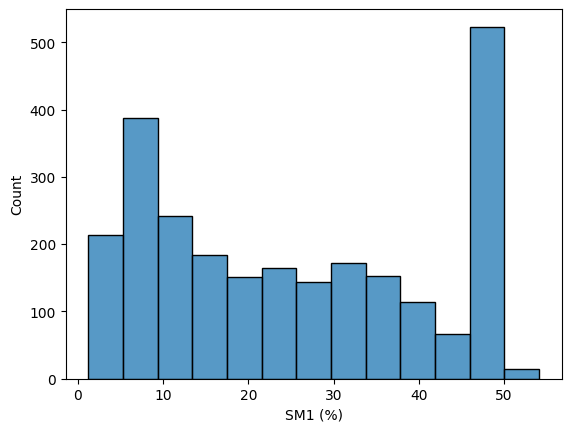

In [22]:
import seaborn as sns

sns.histplot(df['SM1 (%)'])

Found 19 unique timestamps. Setting up plot grid...
Generating subplots...


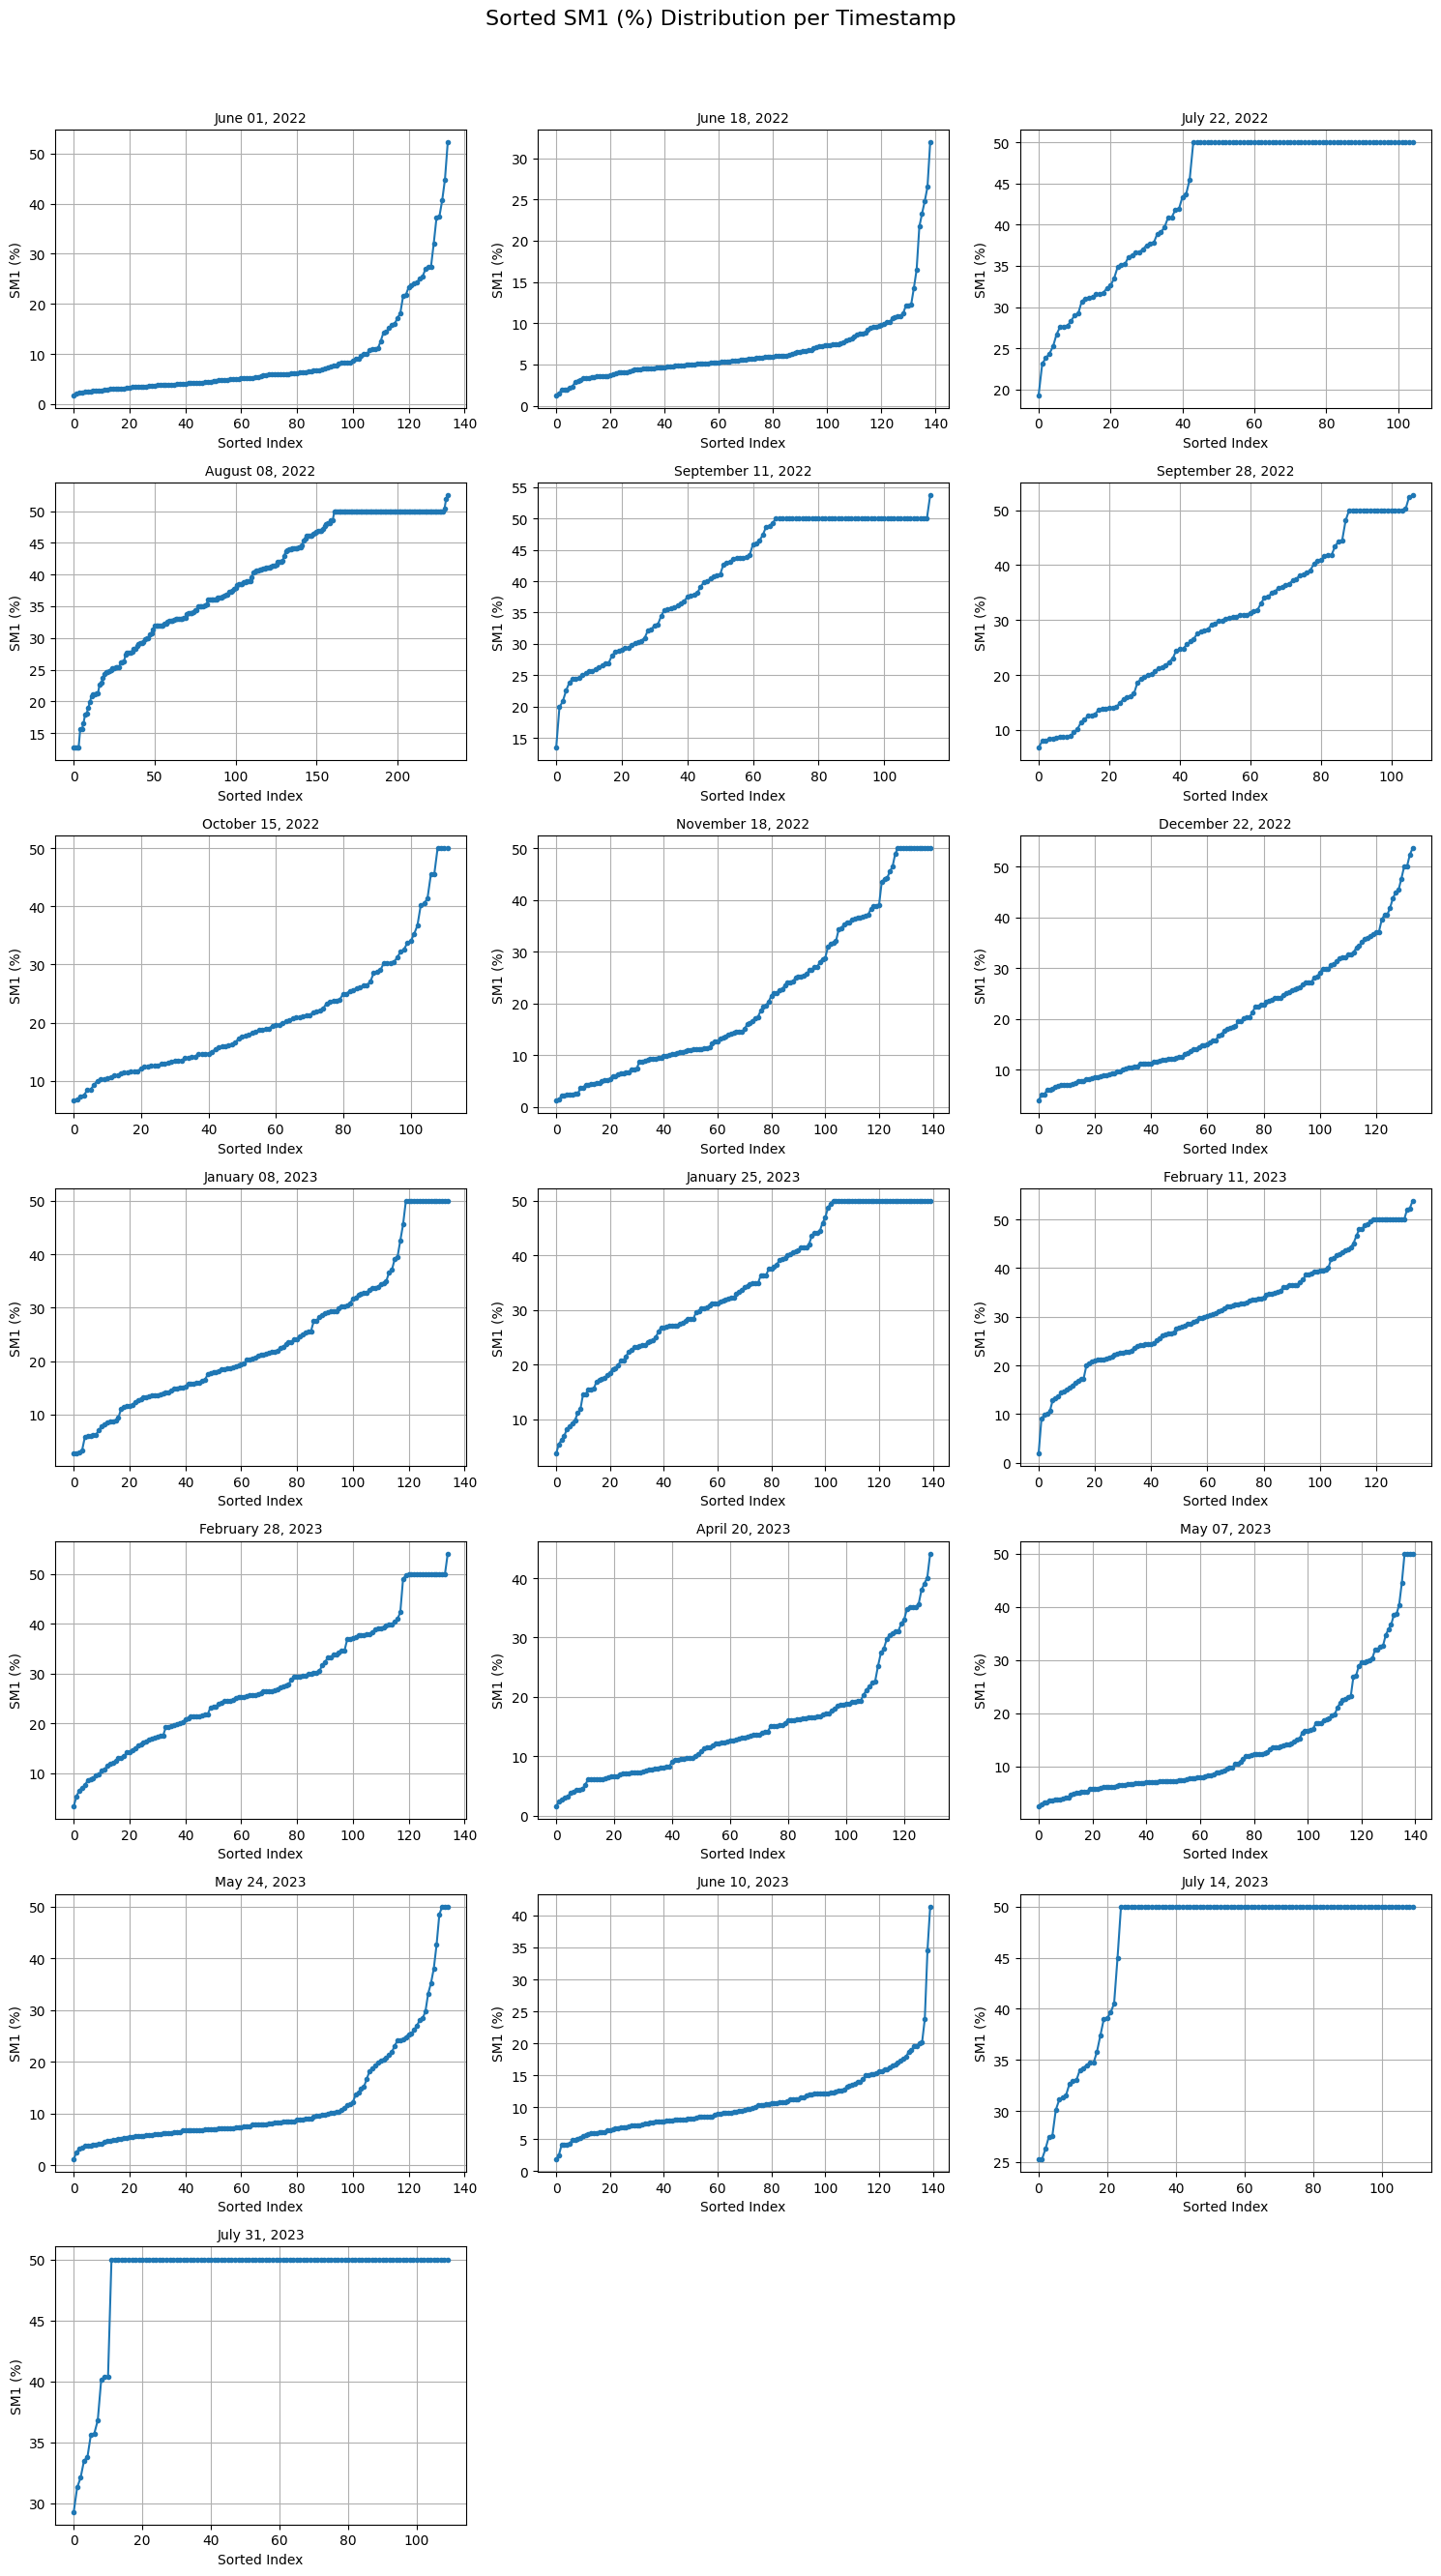

In [23]:
import matplotlib.pyplot as plt

unique_timestamps = sorted(df['Sample Date & Time'].unique())
n_timestamps = len(unique_timestamps)

print(f"Found {n_timestamps} unique timestamps. Setting up plot grid...")

ncols = 3
nrows = (n_timestamps + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))

axes_flat = axes.flatten()

print("Generating subplots...")
for i, ts in enumerate(unique_timestamps):
    ax = axes_flat[i] # Get the current subplot
    
    df_timestamp = df[df['Sample Date & Time'] == ts]
    
    sm_values = df_timestamp['SM1 (%)']
    
    sm_plottable = sm_values.sort_values().reset_index(drop=True)
    
    ax.plot(sm_plottable.index, sm_plottable.values, marker='.', linestyle='-')
    
    ax.set_title(f"{pd.to_datetime(ts).strftime('%B %d, %Y')}", fontsize=10)
    ax.set_xlabel("Sorted Index")
    ax.set_ylabel("SM1 (%)")
    ax.grid(True)

for j in range(n_timestamps, nrows * ncols):
    axes_flat[j].axis('off')

fig.suptitle('Sorted SM1 (%) Distribution per Timestamp', fontsize=16)

fig.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust rect to make space for suptitle

plt.show()

<Axes: ylabel='SM1 (%)'>

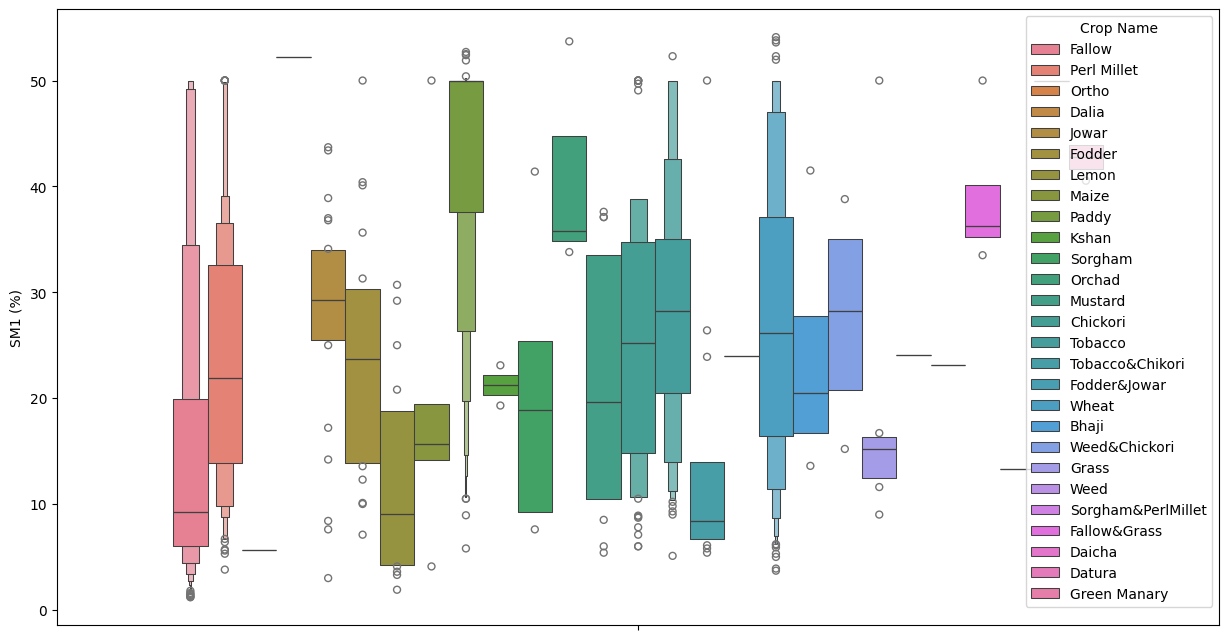

In [30]:
plt.figure(figsize=(15, 8))
sns.boxenplot(data=df, y='SM1 (%)', hue='Crop Name')

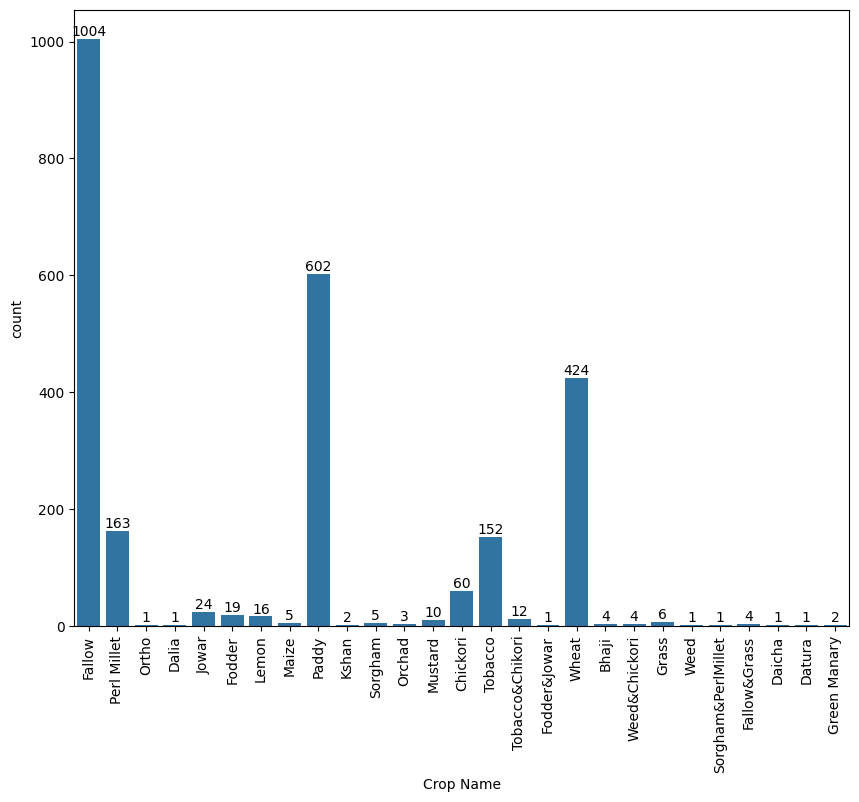

In [31]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Crop Name')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [38]:
df = df.assign(label=pd.qcut(df['SM1 (%)'], q=4, retbins=False, labels=['Low', 'Medium', 'High', 'Very High']))

In [39]:
df

,Sample Date & Time,Sample Id (Grid),Latitude (Centre of grid),Longitude (Centre of grid),HH-pol,HV-pol,SM1 (%),Crop Name,label
0,2022-06-01,1A,22.526048,72.765011,-9.30941,-17.00176,8.200000,Fallow,Low
1,2022-06-01,1B,22.525481,72.765028,-8.10325,-15.88235,44.800000,Perl Millet,Very High
2,2022-06-01,1C,22.525423,72.765663,-9.62345,-17.15174,6.000000,Fallow,Low
3,2022-06-01,1D,22.525999,72.765663,-9.94934,-19.37645,5.700000,Ortho,Low
4,2022-06-01,1E,22.525563,72.765399,-6.80651,-17.59076,2.700000,Fallow,Low
...,...,...,...,...,...,...,...,...,...
139,2023-07-14,28E,22.524049,72.768361,-7.45846,-16.64296,40.533333,Green Manary,High
140,2023-07-14,29A,22.523640,72.766727,-5.49065,-17.98820,50.000000,Paddy,Very High
141,2023-07-14,29B,22.523657,72.766016,-10.19415,-20.11052,50.000000,Paddy,Very High
142,2023-07-14,29C,22.524255,72.766024,-11.80394,-19.46377,50.000000,Paddy,Very High


In [41]:
df[['HH-pol', 'HV-pol', 'SM1 (%)', 'Crop Name', 'label']].to_csv(DATA_PATH / 'eos-04-processed.csv', index=False)